<a href="https://colab.research.google.com/github/kenneth-craig/academyPub/blob/main/ML-XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#upload sonar.csv file from local drive and import file
# load and summarize the sonar dataset
from google.colab import files
import pandas as pd
import numpy as np

file = files.upload()

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data.csv


In [4]:
!pwd
!ls

/content
pima-indians-diabetes.data.csv	sample_data


# Evaluating XGBoost With K-Fold Cross-Validation
**Overfitting** occurs where the model fits the data too well. Overfitting a model results in good accuracy for training data set but poor results on new data sets.

**Underfitting** occurs when the machine learning algorithm cannot capture the underlying trend of the data where the model does not fit the data well enough as a result of:
i) Missing data is not handled

ii) No outlier treatment

iii) Removal of features that do not contribute much to the predictor variable

In [ ]:
 from numpy import loadtxt
 from xgboost import XGBClassifier
 from sklearn.model_selection import StratifiedKFold
 from sklearn.model_selection import cross_val_score

 # load data
 ds = loadtxt('pima-indians-diabetes.csv', delimiter=',')

 

# Simple XGBoost Problem
**Using pima indians diabetes dataset**

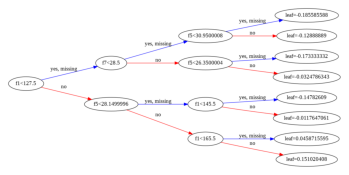

In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from xgboost import plot_tree
from matplotlib import pyplot

ds = np.loadtxt('/content/pima-indians-diabetes.data.csv', delimiter=',')

# Split into X & Y datset
# X is columns 0..7
# & is column 8 transposed
X = ds[:,0:8]
Y = ds[:,8]

# Split into TRAIN & TEST datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

#fit model on training data
model = XGBClassifier()
model.fit(X_train, Y_train)

# make predictions for the test data
predictions = model.predict(X_test)

plot_tree(model, num_trees=0, rankdir='LR')
pyplot.show()

# evaluation predictions
#accuracy = accuracy_score(Y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100))

# Using XGBoost to Predict Iris flower
**Label Encoding**

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#load dataset
df = pd.read_csv('iris.csv', header=None)
ds = df.values

# Split the data into X and Y
X = ds[:,0:4]
Y = ds[:,4]

# Encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
le_y = label_encoder.transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, le_y, test_size=0.33, random_state=7)

# Fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

#make predictions for test data
y_predictions = model.predict(X_test)

# Evaluate predictions
accuracy = accuracy_score(y_test, y_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100))



Accuracy: 92.00%


# XGBoost with Categorical Data
**One Hot Encoding**

In [ ]:
import pandas as pd
from numpy import column_stack
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load data
df = pd.read_csv('/content/datasets-uci-breast-cancer.csv', header=None)

ds = df.values

# split into X & y
X = ds[:,0:9]
X = X.astype(str)
y = ds[:,9]

# Encode string input values as integers
columns = []
for i in range(0, X.shape[1]):
  label_encoder = LabelEncoder()
  feature = label_encoder.fit_transform(X[:,i])
  feature = feature.reshape(X.shape[0], 1)
  # print("feature_shape before onehot: ", feature.shape)
  onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
  feature = onehot_encoder.fit_transform(feature)
  print("feature_shape after onehot: ", feature.shape)
  columns.append(feature)
  
# collapse columns into array
encoded_x = column_stack(columns)
print("encoded X shape: ", encoded_x.shape)

# encoding string class values as integers
label_encoder = LabelEncoder()
label_encoded_y = label_encoder.fit_transform(y)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y, test_size=0.33, random_state=7)

# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_predictions = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


feature_shape after onehot:  (286, 6)
feature_shape after onehot:  (286, 3)
feature_shape after onehot:  (286, 11)
feature_shape after onehot:  (286, 7)
feature_shape after onehot:  (286, 3)
feature_shape after onehot:  (286, 3)
feature_shape after onehot:  (286, 2)
feature_shape after onehot:  (286, 6)
feature_shape after onehot:  (286, 2)
encoded X shape:  (286, 43)
XGBClassifier()
Accuracy: 71.58%


In [ ]:
print(type(encoded_x))
print(encoded_x)

<class 'numpy.ndarray'>
[[0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'


In [ ]:
print(X)

[["'40-49'" "'premeno'" "'15-19'" ... "'3'" "'right'" "'left_up'"]
 ["'50-59'" "'ge40'" "'15-19'" ... "'1'" "'right'" "'central'"]
 ["'50-59'" "'ge40'" "'35-39'" ... "'2'" "'left'" "'left_low'"]
 ...
 ["'30-39'" "'premeno'" "'30-34'" ... "'2'" "'right'" "'right_up'"]
 ["'50-59'" "'premeno'" "'15-19'" ... "'2'" "'right'" "'left_low'"]
 ["'50-59'" "'ge40'" "'40-44'" ... "'3'" "'left'" "'right_up'"]]


In [ ]:
# Method for obtaining unique values for categories
list_col = df.columns.tolist()
for col in list_col:
   i = df.iloc[:,col].unique()
   print (col, ':- ', i)

0 :-  ['2' '1' '?']
1 :-  [1 9]
2 :-  [ 530101  534817  530334 5290409  530255  528355  526802  529607  530051
 5299629  528548  527927  528031 5291329  534917  530233 5301219  526639
 5290481  532110  530157  529340  521681  534998  533692  529518  530526
  528653 5279442  535415  529475  530242  529427  529663  529796  528812
  529493  533847  528996 5277409  529498 5288249  530301  534069  535407
  529827  529888  529821  528890  529642  529766  527706  529483  530544
  529461 5282839  528872  529640  528298  528904  530438  527957  528630
  534293  529667  534885  534784  528931  529777  530276  528214  529424
 5299253  528469 5292929  534092  534615  534753  530693  527463  527518
  534756 5290759 5279822  529849  529304  529388  528006  529703  535381
  534197  530251  530310  528729  535158  530319  534145  534135  530002
  535364  534899  534938 5292489  527563  530381  528668  529764  533696
 5297379  527544  533736  534963  527933  532349  533723  535208 5290482
  533983  535

In [ ]:
# Simplar code as above but used OrdinalLabeling for Age of person instead of OneHot and Accuracy results went down by 1%
import pandas as pd
from numpy import column_stack
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Load data
df = pd.read_csv('/content/datasets-uci-breast-cancer.csv', header=None)

ds = df.values

# split into X & y
X = ds[:,0:9]
X = X.astype(str)
y = ds[:,9]

# Encode string input values as integers
t = [('OrdAge', OrdinalEncoder(), [0]), ('hot', OneHotEncoder(), [1,2,3,4,5,6,7,8])]

transform = ColumnTransformer(transformers=t)

# transform the training data
encoded_x = transform.fit_transform(X)

# encode y output
label_encoder = LabelEncoder()
label_encoded_y = label_encoder.fit_transform(y)

# Create train/test dataset
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y, test_size=0.33, random_state=7)

# Fit model on Training data
model = XGBClassifier();
model.fit(X_train, y_train)
print(model)

# Evaluate model
y_predictions = model.predict(X_test)

#evaluate predictions
accuracy = accuracy_score(y_test, y_predictions)
print("Accuracy %.2f%%" % (accuracy * 100))

XGBClassifier()
Accuracy 70.53%


In [ ]:
# UNFINISHED CODE - Same code as above but trying to get it working using Pythonic with a For Next loop but didn't get it finished
import pandas as pd
from numpy import column_stack
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Load data
df = pd.read_csv('/content/datasets-uci-breast-cancer.csv', header=None)

ds = df.values

# split into X & y
X = ds[:,0:9]
X = X.astype(str)
Y = ds[:,9]

# Encode string input values as integers
t[0] = 'OrdAge', OrdinalEncoder(), [0]

t[1] "'hot', OneHotEncoder(), [1,2,3,4,5,6,7,8]"
t[1] = t1
t1 = "'hot', OneHotEncoder(), ["

for i in range (1, X.shape[1]):
  t1 = t1 + str(i)
  print(t1)

t1 = t1 + X.shape[1] + ']'
print(t1)

transform = ColumnTransformer(transformers=t)

# transform the training data
X_encoded = transformer.fit_transform(X)

# encode y output
label_encoder = LabelEncoder()
label_encoded_y = label_encoder.fit_transform(y)

# Create train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, label_encoded_y, test_size=0.33, random_state=7)

# Fit model on Training data
model = XGBClassifier();
model.fit(X_train, y_train)
print(model)

# Evaluate model
y_predictions = model.predict(X_test)

#evaluate predictions
accuracy = accuracy_score(y_test, y_predictions)
print("%.2f%%" % (accuracy * 100))

SyntaxError: ignored

In [ ]:
# UNFINISHED CODE: For Next loop to build command for COLUMN_TRANSFORMATION for OneHot Encoding all columns

from numpy import array

# Encode string input values as integers

t = []
#t[0] = 'OrdAge', OrdinalEncoder(), [0]

# format of t[1] = 'hot', OneHotEncoder(), [1,2,3,4,5,6,7,8]

t1 = "('hot', OneHotEncoder(), ["

for i in range (1, X.shape[1]):
  t1 = t1 + str(i)
  
  if i != X.shape[1]-1:
    t1 = t1 + ','
  print(t1)

t1 = t1 + ']'
print(t1)

t[0] = ('OrdAge', OrdinalEncoder(), [0])
print('value of t0: ', t[0])
#print(type of )
print('value of t1: ', t[1])

print('value of t', t)

('hot', OneHotEncoder(), [1,
('hot', OneHotEncoder(), [1,2,
('hot', OneHotEncoder(), [1,2,3,
('hot', OneHotEncoder(), [1,2,3,4,
('hot', OneHotEncoder(), [1,2,3,4,5,
('hot', OneHotEncoder(), [1,2,3,4,5,6,
('hot', OneHotEncoder(), [1,2,3,4,5,6,7,
('hot', OneHotEncoder(), [1,2,3,4,5,6,7,8
('hot', OneHotEncoder(), [1,2,3,4,5,6,7,8]


IndexError: ignored

**XGBoost Example of Handling Missing Data**
XGBoost was designed to work with Sparse & Missing Data

In [ ]:
# XGBoost Example With Missing Data
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataframe
df = pd.read_csv("horse-colic.csv", delim_whitespace=True, header=None)

ds = df.values

# Split into X and y
X = ds[:,0:27]
Y = ds[:,27]

# Set missing values to NaN.
# Setting the value to NaN instead of 0 sees the accuracy score lift by 2% from 83.84% to 85.86%
# Imputing with the mean or medium saw the accuracy reduce to 79.80%, the same as setting this value to 1 instead of setting it to 0
X[X == '?'] = 0

# Also covert data set to Numeric instead of String data type
X = X.astype('float32')

# Encoded y class values as 0 & 1 integers using Label Encoder
label_encoder = LabelEncoder()
label_encoded_y = label_encoder.fit_transform(Y)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=0.33, random_state=7)

# Fit model on Training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

# Make predictions for Test data
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy %.2f%%" % (accuracy * 100))



XGBClassifier()
Accuracy 83.84%


In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,5,4,4,?,?,?,3,5,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,3,4,2,?,?,?,4,2,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,3,3,1,?,?,?,1,1,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,2,4,4,1,2,5.00,3,?,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,?,?,?,?,?,?,?,?,74.00,7.40,?,?,2,2,4300,0,0,2
5,2,1,528355,?,?,?,2,1,3,1,2,3,2,2,1,?,3,3,?,?,?,?,1,2,0,0,0,2
6,1,1,526802,37.90,48,16,1,1,1,1,3,3,3,1,1,?,3,5,37.00,7.00,?,?,1,1,3124,0,0,2
7,1,1,529607,?,60,?,3,?,?,1,?,4,2,2,1,?,3,4,44.00,8.30,?,?,2,1,2208,0,0,2
8,2,1,530051,?,80,36,3,4,3,1,4,4,4,2,1,?,3,5,38.00,6.20,?,?,3,1,3205,0,0,2
9,2,9,5299629,38.30,90,?,1,?,1,1,5,3,1,2,1,?,3,?,40.00,6.20,1,2.20,1,2,0,0,0,1
